# SHAP Summary Plot

shows the global importance of features and their impact on the model's predictions.

In [2]:
import joblib
import pandas as pd

#load the training dataset
data_path = "../data/historical_ds/"
data = pd.read_csv(data_path + "sliding_window_supplier_data_with_target.csv") #"aggregated_supplier_data_with_target.csv")

# Load the trained model
models_path = "../models/"
final_model = joblib.load(models_path + "supplier_warning_model.pkl")

# Sort the data by the analysis window start date to maintain temporal order
data = data.sort_values(by="analysis_start")

# Separate features and target variable
X = data.drop(columns=["supplier_id", "ncr_or_warning_letter", "analysis_start", "analysis_end", "prediction_start", "prediction_end"])
y = data["ncr_or_warning_letter"]

In [23]:
from sklearn.model_selection import TimeSeriesSplit
# Define the number of splits for TimeSeriesSplit
n_splits = 5
tscv = TimeSeriesSplit(n_splits=n_splits)
for train_index, test_index in tscv.split(X):
    # Split the data into training and testing sets
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [24]:
X.shape, y.shape, X_test.shape

((1140, 12), (1140,), (190, 12))

In [21]:
shap_values[1].shape

(12, 2)

In [5]:
model = final_model
# Predict probabilities
data["risk_probability"] = model.predict_proba(X)[:, 1]

# Shap summary plot

In [13]:
X.shape, shap_values.shape

((1140, 12), (12, 2))

In [12]:
# Initialize the SHAP explainer
explainer = shap.TreeExplainer(final_model)

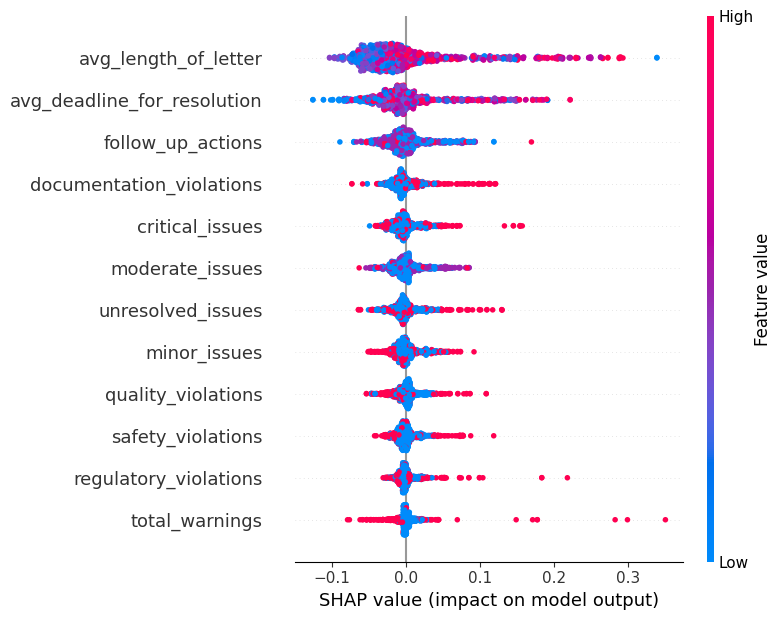

In [34]:
import shap
import matplotlib.pyplot as plt



# Compute SHAP values for the dataset
shap_values = explainer.shap_values(X)

# Generate the SHAP summary plot for the positive class (class 1)
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values[:,:,1], X)  # Use shap_values[1] for the positive class


# Shap dependence plot

<Figure size 800x600 with 0 Axes>

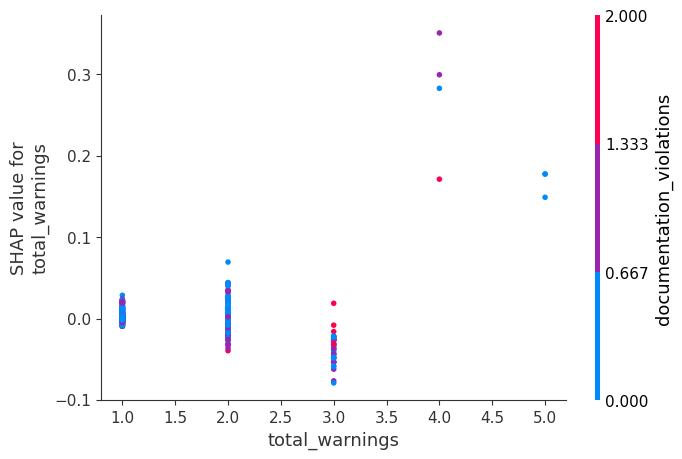

In [35]:
# Generate a SHAP dependence plot for a specific feature (e.g., "total_warnings")
plt.figure(figsize=(8, 6))
shap.dependence_plot("total_warnings", shap_values[:,:,1], X)


# Shap Waterfall 

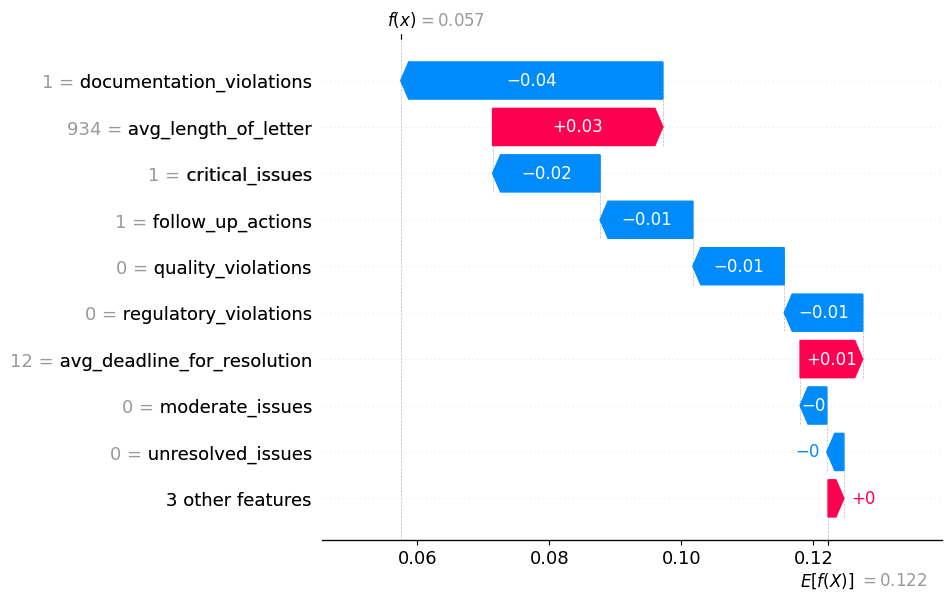

In [36]:
from shap import TreeExplainer, Explanation
from shap.plots import waterfall

sv = explainer(X)
exp = Explanation(sv.values[:,:,1], 
                  sv.base_values[:,1], 
                  data=X.values, 
                  feature_names=X.columns)
idx = 0
waterfall(exp[idx])

# SHAP Force Plot (Local Explanation)

In [21]:
# Select a single instance for explanation
instance = X.iloc[0]
instance

total_warnings                   1.0
critical_issues                  1.0
moderate_issues                  0.0
minor_issues                     0.0
safety_violations                0.0
quality_violations               0.0
documentation_violations         1.0
regulatory_violations            0.0
unresolved_issues                0.0
follow_up_actions                1.0
avg_length_of_letter           934.0
avg_deadline_for_resolution     12.0
Name: 0, dtype: float64

In [22]:
data.iloc[0]

supplier_id                          S100
total_warnings                          1
critical_issues                         1
moderate_issues                         0
minor_issues                            0
safety_violations                       0
quality_violations                      0
documentation_violations                1
regulatory_violations                   0
unresolved_issues                       0
follow_up_actions                       1
avg_length_of_letter                934.0
avg_deadline_for_resolution          12.0
analysis_start                 2023-01-01
analysis_end                   2024-01-01
prediction_start               2024-01-01
prediction_end                 2024-07-01
ncr_or_warning_letter                   0
risk_probability                   0.0575
Name: 0, dtype: object

In [23]:


# Generate SHAP values for the instance
shap_values_instance = explainer.shap_values(instance)

# Generate the SHAP force plot for the positive class (class 1)
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values_instance[:,1], instance)



# Loop waterfall

In [7]:
import shap
import matplotlib.pyplot as plt

model = final_model
# Initialize SHAP explainer
explainer = shap.Explainer(model, X)

# Get top 5 highest-risk suppliers
top_suppliers = data.nlargest(5, "risk_probability").index  

# Loop over each supplier
for i, supplier_index in enumerate(top_suppliers):
    print(f"🔍 Supplier {data.loc[supplier_index, 'supplier_id']} - Risk Probability: {data.loc[supplier_index, 'risk_probability']:.2f}")

    # Compute SHAP values for this supplier
    shap_values = explainer(X.iloc[[supplier_index]])  # Keep DataFrame format

    # Plot SHAP waterfall
    plt.figure(figsize=(10, 6))
    shap.waterfall_plot(shap_values[0])


🔍 Supplier S497 - Risk Probability: 0.92


ValueError: The waterfall plot can currently only plot a single explanation, but a matrix of explanations (shape (12, 2)) was passed! Perhaps try `shap.plots.waterfall(shap_values[0])` or for multi-output models, try `shap.plots.waterfall(shap_values[0, 0])`.

<Figure size 1000x600 with 0 Axes>

In [9]:
shap_values[0].shape

(12, 2)

# Feature Importance Bar Plot

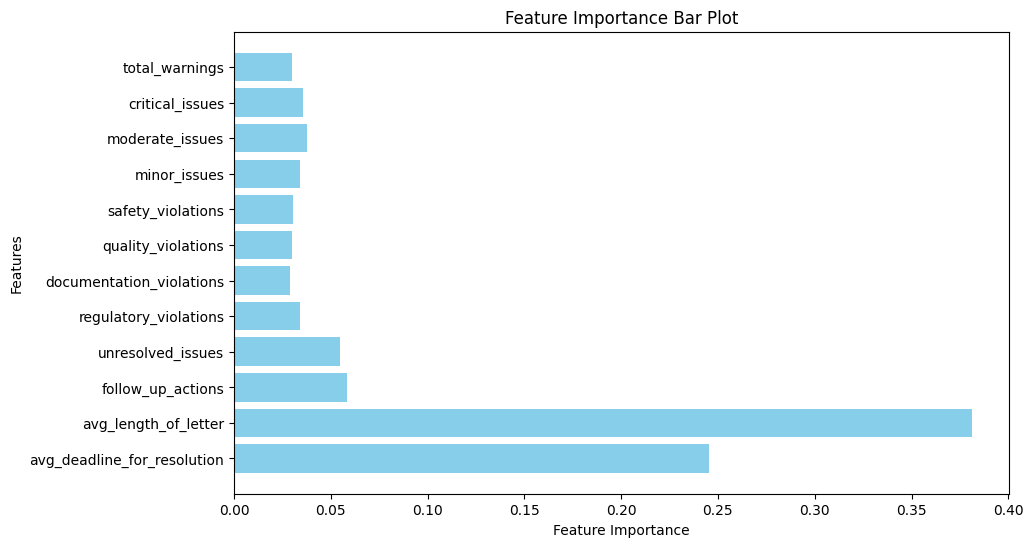

In [14]:
importances = final_model.feature_importances_
feature_names = X.columns

# Create a bar plot of feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances, color="skyblue")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance Bar Plot")
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()


# Confussion Matrix

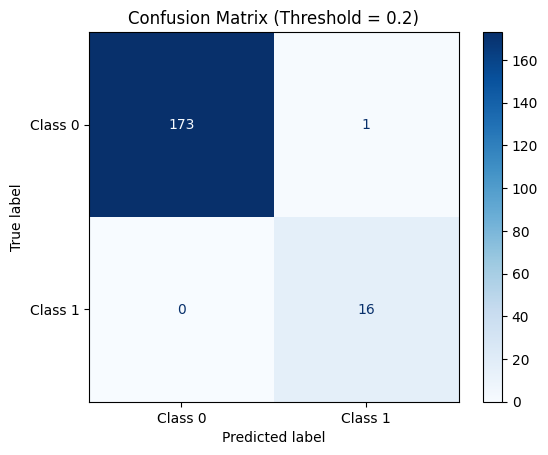

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming `final_model` is your trained model and `X_test` is your test data
# Predict probabilities for the positive class
y_probs = final_model.predict_proba(X_test)[:, 1]  # Probabilities for class 1

# Apply the custom threshold of 0.2
threshold = 0.2
y_pred_threshold = (y_probs >= threshold).astype(int)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_threshold)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Class 0", "Class 1"])
disp.plot(cmap=plt.cm.Blues)
plt.title(f"Confusion Matrix (Threshold = {threshold})")
plt.show()


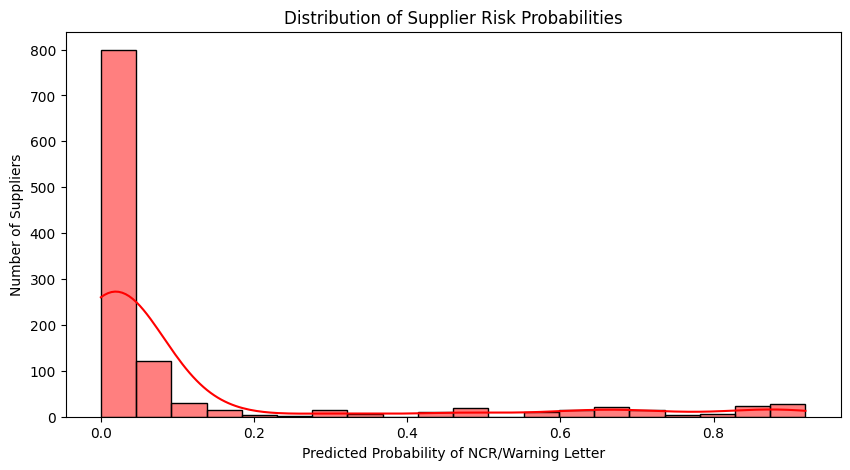

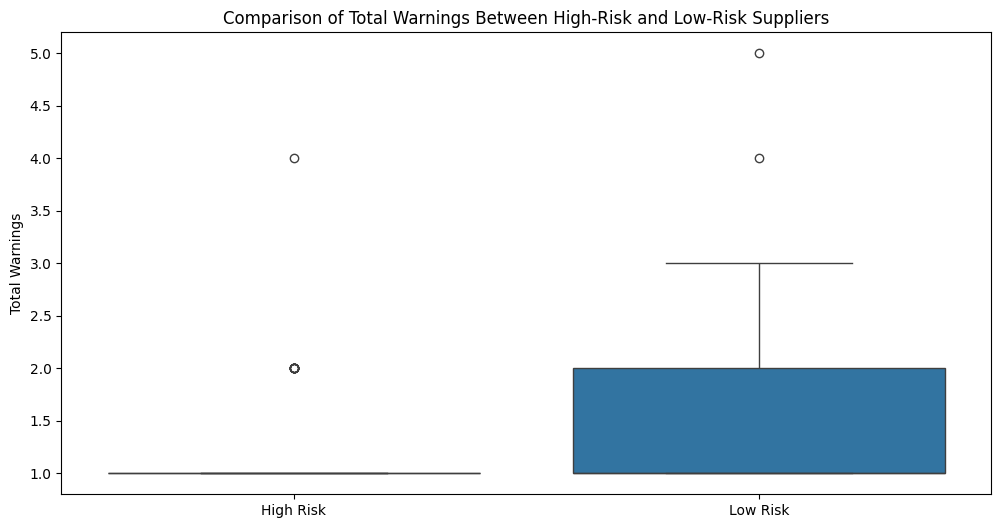

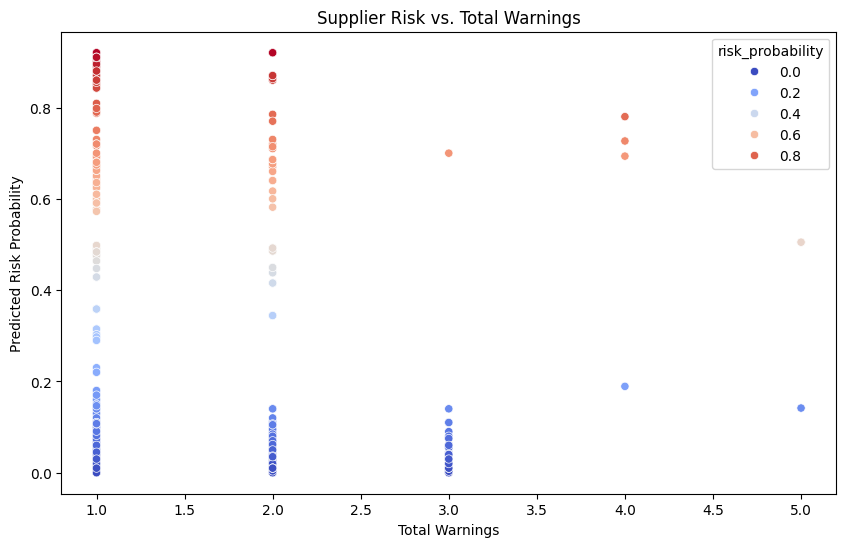

In [50]:
import seaborn as sns

# ===================== PLOTS =====================

# 1. **Risk Probability Distribution**
plt.figure(figsize=(10, 5))
sns.histplot(data["risk_probability"], bins=20, kde=True, color="red")
plt.title("Distribution of Supplier Risk Probabilities")
plt.xlabel("Predicted Probability of NCR/Warning Letter")
plt.ylabel("Number of Suppliers")
plt.show()

# 2. **Feature Importance**
'''plt.figure(figsize=(10, 5))
xgb.plot_importance(model, importance_type="gain", max_num_features=10)
plt.title("Top 10 Most Important Features for Supplier Risk Prediction")
plt.show()'''

# 3. **Comparison of High-Risk vs. Low-Risk Suppliers**
high_risk = data[data["risk_probability"] > 0.75]
low_risk = data[data["risk_probability"] < 0.25]

plt.figure(figsize=(12, 6))
sns.boxplot(data=pd.concat([high_risk, low_risk]), 
            x=["High Risk"] * len(high_risk) + ["Low Risk"] * len(low_risk), 
            y=pd.concat([high_risk["total_warnings"], low_risk["total_warnings"]]))
plt.title("Comparison of Total Warnings Between High-Risk and Low-Risk Suppliers")
plt.ylabel("Total Warnings")
plt.show()

# 4. **Scatter Plot: Violations vs. Risk**
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x="total_warnings", y="risk_probability", hue="risk_probability", palette="coolwarm")
plt.title("Supplier Risk vs. Total Warnings")
plt.xlabel("Total Warnings")
plt.ylabel("Predicted Risk Probability")
plt.show()


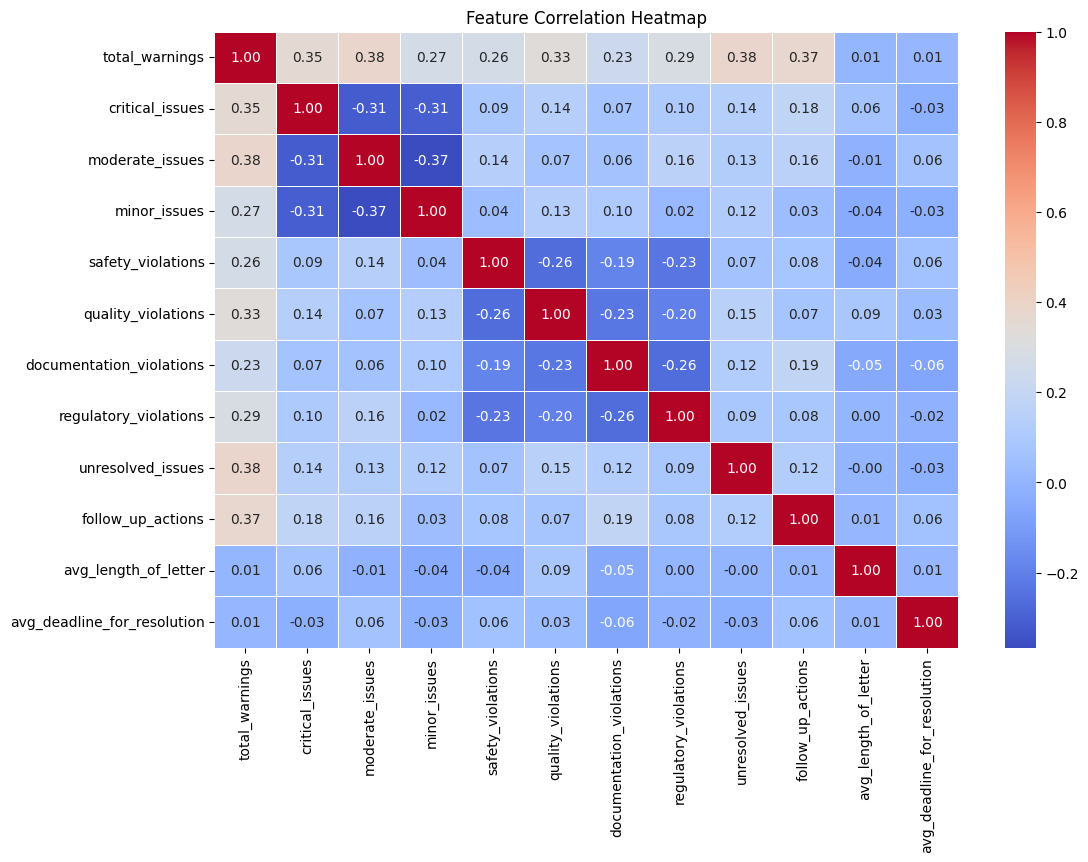

In [52]:
# 5. Correlation Heatmap (Features vs. Risk Probability)
plt.figure(figsize=(12, 8))
correlation_matrix = X.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


# Supplier Risk Segmentation

/var/folders/my/vcxzmhpd1l1f6bhyh61p0qqh0000gn/T/ipykernel_74587/3974711645.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data["risk_category"], palette={"Low Risk": "green", "Medium Risk": "orange", "High Risk": "red"})


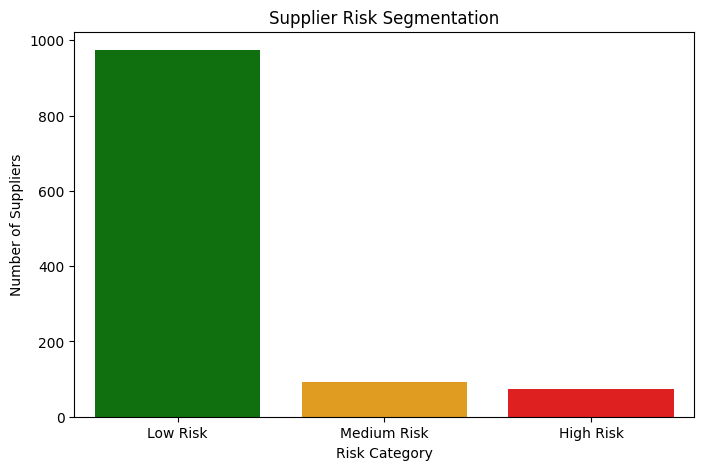

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

# Categorize risk levels
def categorize_risk(prob):
    if prob < 0.3:
        return "Low Risk"
    elif prob < 0.7:
        return "Medium Risk"
    else:
        return "High Risk"

data["risk_category"] = model.predict_proba(X)[:, 1]
data["risk_category"] = data["risk_category"].apply(categorize_risk)

# Plot risk distribution
plt.figure(figsize=(8, 5))
sns.countplot(x=data["risk_category"], palette={"Low Risk": "green", "Medium Risk": "orange", "High Risk": "red"})
plt.title("Supplier Risk Segmentation")
plt.xlabel("Risk Category")
plt.ylabel("Number of Suppliers")
plt.show()



# Identify High Risk Supplier

🚨 Extreme-Risk Suppliers Needing Urgent Attention 🚨
    supplier_id  risk_probability
249        S692          0.787500
248        S691          0.846667
241        S675          0.912500
273        S750          0.870000
265        S734          0.910000
..          ...               ...
908         S47          0.640000
921        S493          0.146667
941        S547          0.680000
936        S525          0.572500
887        S413          0.170000

[184 rows x 2 columns]


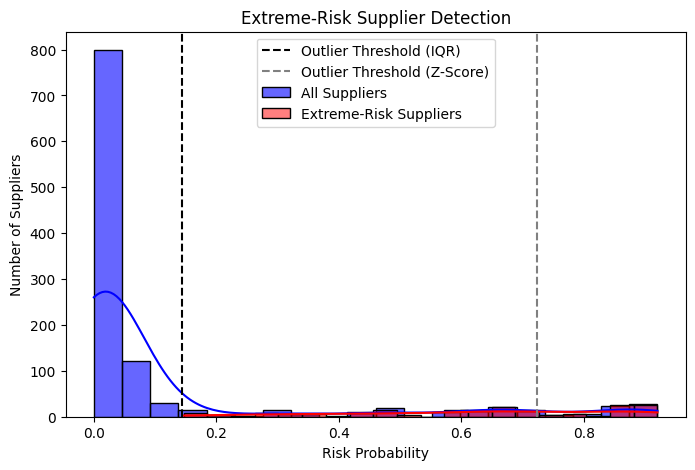

In [74]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Get risk probabilities
risk_probs = model.predict_proba(X)[:, 1]

# Z-Score Method
mean_risk = np.mean(risk_probs)
std_risk = np.std(risk_probs)
z_scores = (risk_probs - mean_risk) / std_risk

# Define extreme risk threshold (Z > 2.5 as an example)
extreme_risk_threshold = 2.5
extreme_risk_suppliers_z = data[z_scores > extreme_risk_threshold]

# IQR Method
Q1 = np.percentile(risk_probs, 25)
Q3 = np.percentile(risk_probs, 75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
extreme_risk_suppliers_iqr = data[risk_probs > upper_bound]

# Combine results
extreme_risk_suppliers = pd.concat([extreme_risk_suppliers_z, extreme_risk_suppliers_iqr]).drop_duplicates()

# Display high-risk suppliers
print("🚨 Extreme-Risk Suppliers Needing Urgent Attention 🚨")
print(extreme_risk_suppliers[["supplier_id", "risk_probability"]])

# Plot distribution with outliers highlighted
plt.figure(figsize=(8, 5))
sns.histplot(risk_probs, bins=20, kde=True, color="blue", alpha=0.6, label="All Suppliers")
sns.histplot(extreme_risk_suppliers["risk_probability"], bins=20, kde=True, color="red", label="Extreme-Risk Suppliers")
plt.axvline(upper_bound, color="black", linestyle="dashed", label="Outlier Threshold (IQR)")
plt.axvline(mean_risk + extreme_risk_threshold * std_risk, color="gray", linestyle="dashed", label="Outlier Threshold (Z-Score)")
plt.xlabel("Risk Probability")
plt.ylabel("Number of Suppliers")
plt.title("Extreme-Risk Supplier Detection")
plt.legend()
plt.show()


# Do Longer Resolution Times Increase Risk?

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# Extract relevant columns
resolution_time = data["avg_deadline_for_resolution"]
risk_prob = model.predict_proba(X)[:, 1]  # Get risk probabilities

# Compute correlation
corr, p_value = stats.pearsonr(resolution_time, risk_prob)

# Print correlation result
print(f"📈 Correlation between Resolution Time & Risk: {corr:.2f} (p-value: {p_value:.4f})")


📈 Correlation between Resolution Time & Risk: 0.02 (p-value: 0.4338)


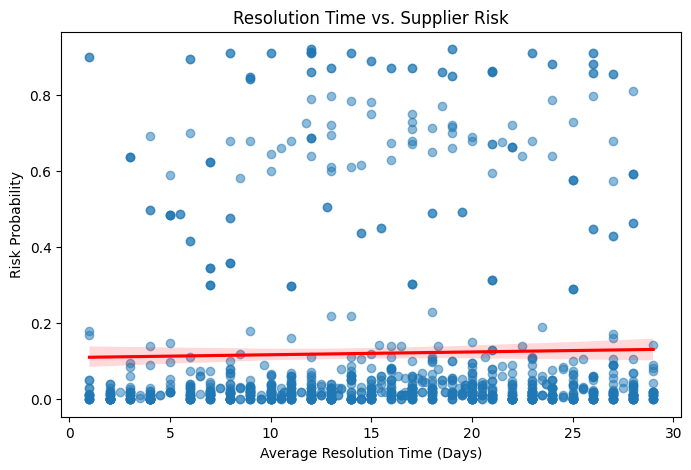

In [77]:
plt.figure(figsize=(8, 5))
sns.regplot(x=resolution_time, y=risk_prob, scatter_kws={"alpha": 0.5}, line_kws={"color": "red"})
plt.xlabel("Average Resolution Time (Days)")
plt.ylabel("Risk Probability")
plt.title("Resolution Time vs. Supplier Risk")
plt.show()


/var/folders/my/vcxzmhpd1l1f6bhyh61p0qqh0000gn/T/ipykernel_74587/3545580689.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="risk_category", y="avg_deadline_for_resolution", data=data,


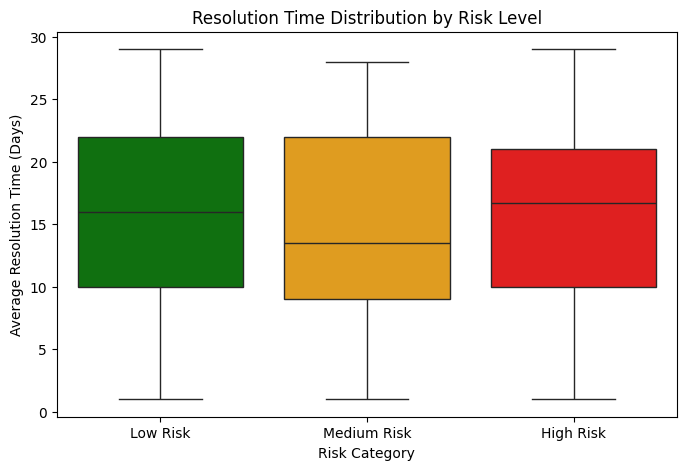

In [79]:
import pandas as pd

# Convert risk probabilities to a Pandas Series
risk_prob_series = pd.Series(risk_prob)

# Categorize risk levels
def categorize_risk(prob):
    if prob < 0.3:
        return "Low Risk"
    elif prob < 0.7:
        return "Medium Risk"
    else:
        return "High Risk"

# Apply categorization to risk probabilities
data["risk_category"] = risk_prob_series.apply(categorize_risk)

# Boxplot for resolution time across risk categories
plt.figure(figsize=(8, 5))
sns.boxplot(x="risk_category", y="avg_deadline_for_resolution", data=data, 
            palette={"Low Risk": "green", "Medium Risk": "orange", "High Risk": "red"})
plt.xlabel("Risk Category")
plt.ylabel("Average Resolution Time (Days)")
plt.title("Resolution Time Distribution by Risk Level")
plt.show()


# Feature Distributions by Risk	Understand which violations impact high-risk suppliers

/var/folders/my/vcxzmhpd1l1f6bhyh61p0qqh0000gn/T/ipykernel_74587/1331508222.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="risk_category", y=violation, data=data,


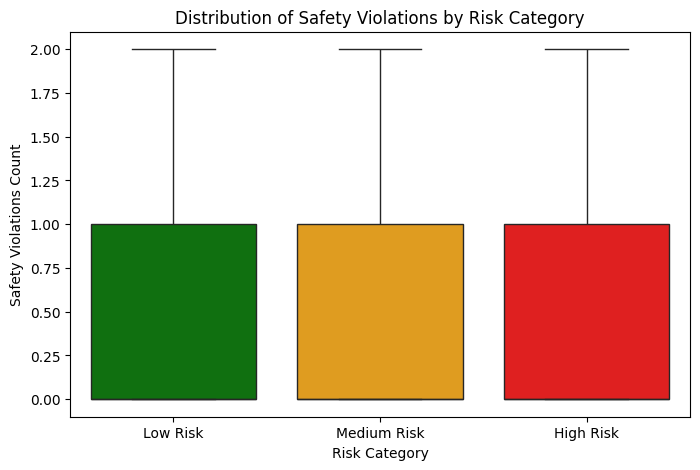

/var/folders/my/vcxzmhpd1l1f6bhyh61p0qqh0000gn/T/ipykernel_74587/1331508222.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="risk_category", y=violation, data=data,


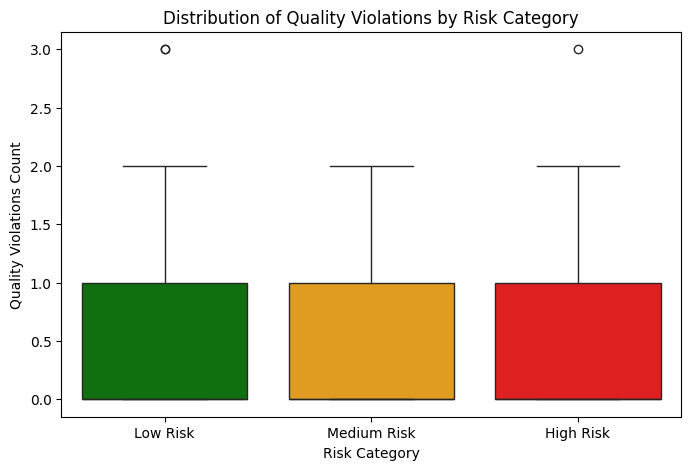

/var/folders/my/vcxzmhpd1l1f6bhyh61p0qqh0000gn/T/ipykernel_74587/1331508222.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="risk_category", y=violation, data=data,


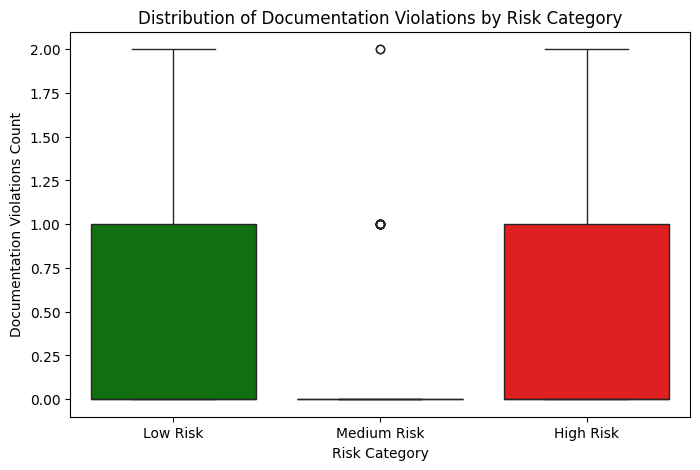

/var/folders/my/vcxzmhpd1l1f6bhyh61p0qqh0000gn/T/ipykernel_74587/1331508222.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="risk_category", y=violation, data=data,


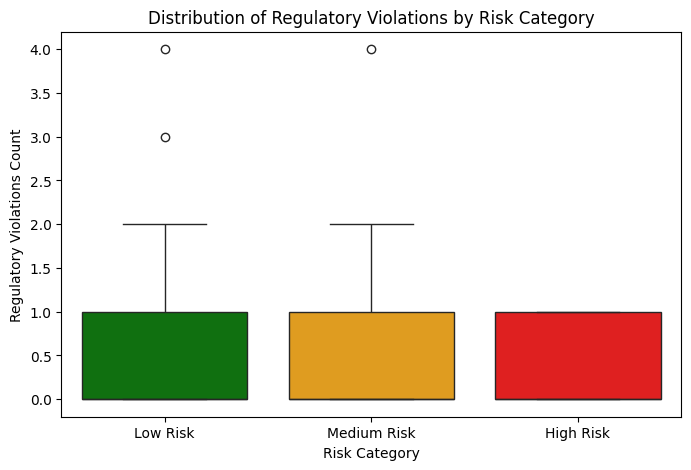

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of violation columns
violation_columns = ['safety_violations', 'quality_violations', 'documentation_violations', 'regulatory_violations']

# Loop over each violation column and plot by risk category
for violation in violation_columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x="risk_category", y=violation, data=data, 
                palette={"Low Risk": "green", "Medium Risk": "orange", "High Risk": "red"})
    plt.title(f"Distribution of {violation.replace('_', ' ').title()} by Risk Category")
    plt.xlabel("Risk Category")
    plt.ylabel(f"{violation.replace('_', ' ').title()} Count")
    plt.show()
